In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("H:/Some CSV datasets/ILPD.csv")

In [3]:
data.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [4]:
var = ['Age', 'Gender' ,'TB','DB' ,'AlkPhos', 'Sgpt', 'Sgot' ,'TP' ,'ALB', 'A/G' ,'Selector']

In [5]:
data.columns = var

In [6]:
data.head()

,Age,Gender,TB,DB,AlkPhos,Sgpt,Sgot,TP,ALB,A/G,Selector
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [7]:
data.shape

(582, 11)

In [8]:
pd.isnull(data).sum()

Age         0
Gender      0
TB          0
DB          0
AlkPhos     0
Sgpt        0
Sgot        0
TP          0
ALB         0
A/G         4
Selector    0
dtype: int64

In [9]:
cleaned_data = data.dropna()

In [10]:
pd.isnull(cleaned_data).sum()

Age         0
Gender      0
TB          0
DB          0
AlkPhos     0
Sgpt        0
Sgot        0
TP          0
ALB         0
A/G         0
Selector    0
dtype: int64

In [11]:
cleaned_data.describe()

,Age,TB,DB,AlkPhos,Sgpt,Sgot,TP,ALB,A/G,Selector
count,578.000000,578.000000,578.00000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,44.747405,3.319896,1.49654,291.546713,81.238754,110.574394,6.481142,3.138235,0.947145,1.285467
std,16.213968,6.232158,2.81834,243.734041,183.321431,290.075539,1.085500,0.795094,0.319863,0.452028
min,4.000000,0.400000,0.10000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.20000,175.250000,23.250000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.30000,208.500000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,58.000000,2.600000,1.30000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.70000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [12]:
cor_mat = cleaned_data.corr()
cor_mat

,Age,TB,DB,AlkPhos,Sgpt,Sgot,TP,ALB,A/G,Selector
Age,1.000000,0.011925,0.007866,0.079924,-0.087158,-0.019839,-0.187148,-0.265016,-0.216386,-0.132024
TB,0.011925,1.000000,0.874440,0.205491,0.213173,0.237148,-0.007694,-0.221980,-0.206410,-0.220787
DB,0.007866,0.874440,1.000000,0.233727,0.232950,0.256826,0.000285,-0.228291,-0.200297,-0.246952
AlkPhos,0.079924,0.205491,0.233727,1.000000,0.124546,0.166384,-0.026850,-0.163300,-0.234318,-0.183924
Sgpt,-0.087158,0.213173,0.232950,0.124546,1.000000,0.791822,-0.042259,-0.028536,-0.002466,-0.163580
Sgot,-0.019839,0.237148,0.256826,0.166384,0.791822,1.000000,-0.025593,-0.084813,-0.070129,-0.152249
TP,-0.187148,-0.007694,0.000285,-0.026850,-0.042259,-0.025593,1.000000,0.783095,0.234984,0.033949
ALB,-0.265016,-0.221980,-0.228291,-0.163300,-0.028536,-0.084813,0.783095,1.000000,0.689722,0.160053
A/G,-0.216386,-0.206410,-0.200297,-0.234318,-0.002466,-0.070129,0.234984,0.689722,1.000000,0.163030
Selector,-0.132024,-0.220787,-0.246952,-0.183924,-0.163580,-0.152249,0.033949,0.160053,0.163030,1.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

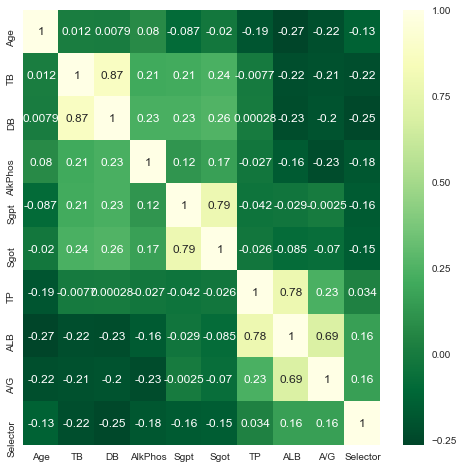

In [14]:
cleaned_data = pd.DataFrame(cleaned_data)
fig = plt.figure(figsize=(8, 8))
hm = sns.heatmap(cor_mat,annot = True, cmap='YlGn_r')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
le.fit(cleaned_data.Gender)

LabelEncoder()

In [17]:
cleaned_data.loc[:,'Gender'] = le.transform(cleaned_data.Gender)

In [18]:
cleaned_data.head()

,Age,Gender,TB,DB,AlkPhos,Sgpt,Sgot,TP,ALB,A/G,Selector
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1


# Outlier Treatment

In [19]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet
robust_cov = MinCovDet().fit(cleaned_data)

In [53]:
dist=pd.DataFrame(robust_cov.mahalanobis(cleaned_data))

In [54]:
len(dist)

578

In [38]:
dist=round(dist)
dist.describe()

,0
count,578.000000
mean,1178.621107
std,12848.044181
min,3.000000
25%,8.000000
50%,17.000000
75%,129.500000
max,295367.000000


In [45]:
max_val=129.50+1.5*121
min_val=8-1.5*121

In [40]:
dist1=dist[~((dist<min) | (dist >max))]

In [55]:
index_bool = (dist.loc[:,0]> max_val) | (dist.loc[:,0]< min_val)

In [58]:
index = np.array(range(cleaned_data.shape[0]))[~index_bool]

In [63]:
cleaned_data1 = cleaned_data.iloc[index,:]

In [64]:
cleaned_data1.head()

,Age,Gender,TB,DB,AlkPhos,Sgpt,Sgot,TP,ALB,A/G,Selector
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
5,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [66]:
cleaned_data1.shape

(478, 11)

In [68]:
predictors = cleaned_data1.drop('Selector',axis=1) 

In [69]:
#target = cleaned_data.loc[:,'Selector']

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [86]:
model_tree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=6)

In [87]:
model_tree.fit(X=predictors,y= cleaned_data1['Selector'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

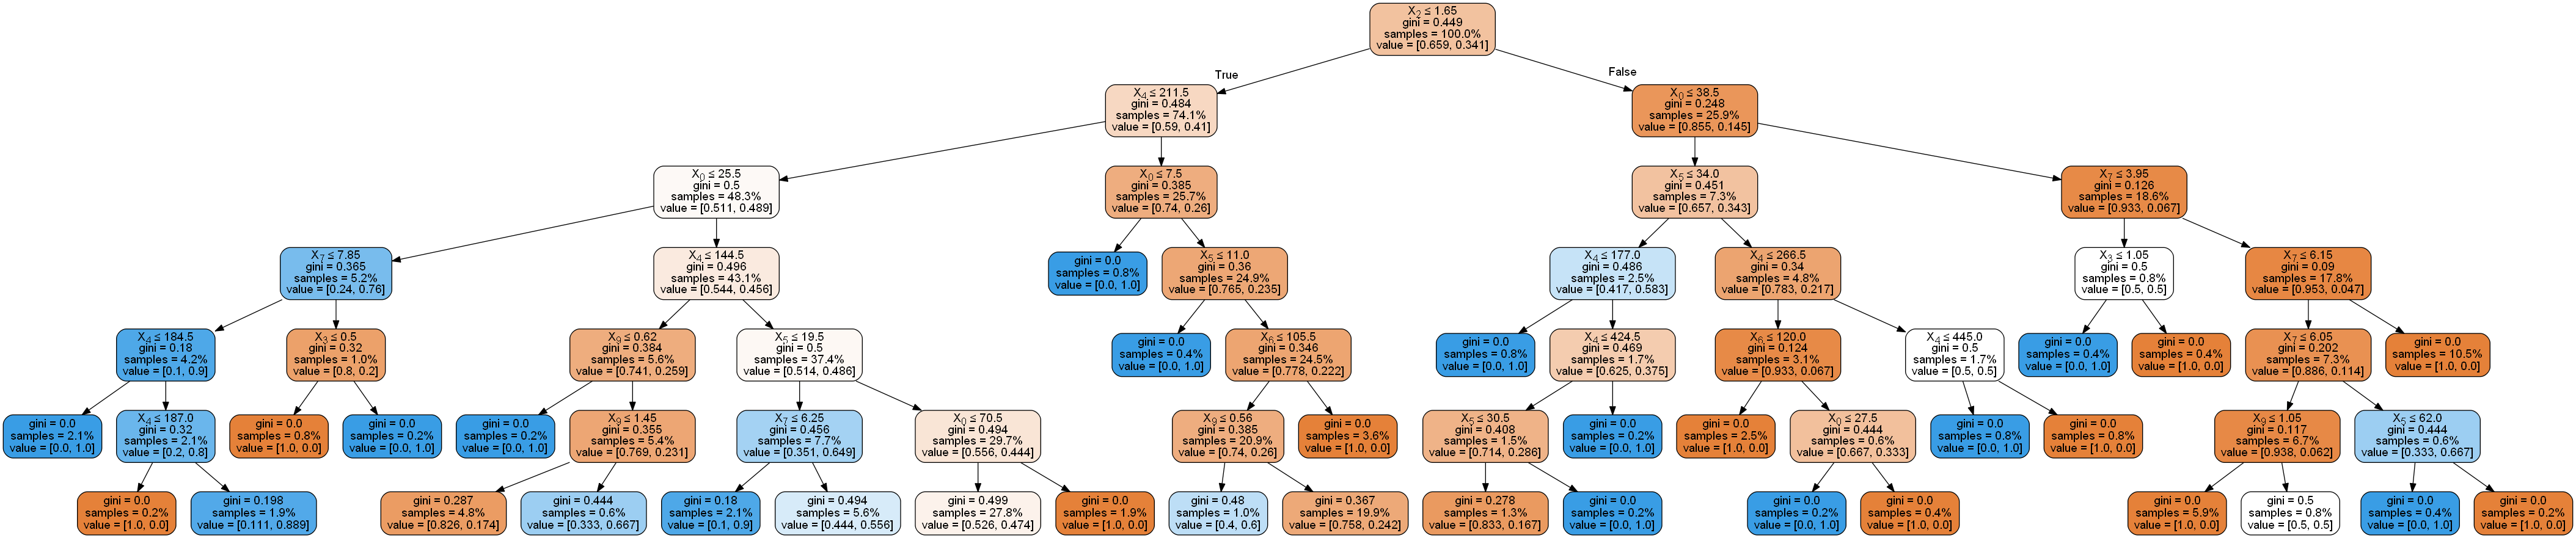

In [88]:
dot_data = StringIO()

export_graphviz(model_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [89]:
pred_tree_training = model_tree.predict(X = predictors)

In [90]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score
print(confusion_matrix(pred_tree_training,cleaned_data1['Selector']))
print(cohen_kappa_score(pred_tree_training,cleaned_data1['Selector']))
print(accuracy_score(pred_tree_training,cleaned_data1['Selector']))

[[298  93]
 [ 17  70]]
0.423072702934
0.769874476987
